1. A description of the problem and a discussion of the background.
    - Hong Kong is a city with extremely high population density and diverse culture. Different districts may possess very different features and environment. High gap of wealth is also a characteristic of this society, which can potentionally bring along many social problems.
    - Education has always been a hot topic and attracts a lot of attentions in HK society. Both students and parents face high competitive pressure. There are three types of primary schools, government funded, private and international schools. While the educational resources and cultural influences may differ in these three types of schools, the neighborhood around these schools may also have certain patterns that might be influential to the students.
    - In an attempt to focus on education in the context of Hong Kong districts, the following questions/aims are raised for this project:
        1. Are there any general features for venues nearby primary schools? Can these features help group schools into clusters?
        2. If the schools can be clustered, does it correlate to its category (government, private or international?), or the district where it is located?
        3. Is educational resource correlated with other features of the district, e.g. household income, rent, etc.?
        4. From the above observations, generate implications for students, parents or educators 
2. A description of the data and how it will be used to solve the problem.
    - List for primary schools with classified types and location (including which district it belongs to)
    <br> The top nearby venues of each school will be extracted using Foursqare with the same searching parameter. The numbers of venues belonging to each category will be summarized and used as features for clustering using Kmeans. A label will be assigned to each school based on the clustering result and its relationship will be explored with the type of the school (government, private or international) and the district it belongs to.
    - Statistics for each district including population, median monthly domestic household rent, median monthly domestic household income, median mortgage payment and loan repayment, median rent to income ratio,etc.
    <br>For each district, the number of schools for each category and each cluster based on nearby venues will be summarized.The correlations between these data with the upper-listed statistics will be explored.


1. A link to your Notebook on your Github repository, showing your code. (15 marks)
4. A full report consisting of all of the following components (15 marks):
    - Introduction where you discuss the business problem and who would be interested in this project.
    - Data where you describe the data that will be used to solve the problem and the source of the data.
    - Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.
    - Results section where you discuss the results.
    - Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.
    - Conclusion section where you conclude the report.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
# uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
# uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2019.8.28-0, anaconda/win-64::certifi-2019.9.11-py37_0, anaconda/win-64::openssl-1.1.1d-he774522_2
  - anaconda/win-64::ca-certificates-2019.8.28-0, anaconda/win-64::certifi-2019.9.11-py37_0, defaults/win-64::openssl-1.1.1d-he774522_2
  - anaconda/win-64::ca-certificates-2019.8.28-0, anaconda/win-64::openssl-1.1.1d-he774522_2, defaults/win-64::certifi-2019.9.11-py37_0
  - anaconda/win-64::ca-certificates-2019.8.28-0, defaults/win-64::certifi-2019.9.11-py37_0, defaults/win-64::openssl-1.1.1d-he774522_2
  - anaconda/win-64::openssl-1.1.1d-he774522_2, defaults/win-64::ca-certificates-2019.8.28-0, defaults/win-64::certifi-2019.9.11-py37_0
  - defaults/win-64::ca-certificates-2019.8.28-0, defaults/win-64::certifi-2019.9.11-py37_0, defaults/win-64::openssl-1.1.1d-he774522_2
  - anaconda/win-64::certifi-2019.9.11-py37_0, anaconda/win-64::openssl-1.1.1d-he774522_2, defaults/win-64::ca-certificates-2019.8.28-0
  - anaconda

### Import data for primary schools and pre-process

In [42]:
school = pd.read_csv('hk_primary_school_stat.csv',na_values = ['N.A.','NOT APPLICABLE'])

In [43]:
school.columns = ['SCHOOL NO.', 'School', 'Latitude', 'Longitude', 'Address',
       'Dataset', 'Students Gender', 'Session', 'District', 'Religion']

In [7]:
len(school['SCHOOL NO.'].unique())

607

In [8]:
len(school['School'].unique())

584

In [44]:
school_grouped = school.groupby('School').count()

In [45]:
school_rep = school_grouped[school_grouped['SCHOOL NO.'] > 1].reset_index()['School']
school_rep

0                                 CLEARWATER BAY SCHOOL
1                         DISCOVERY MIND PRIMARY SCHOOL
2              FUK TAK EDUCATION SOCIETY PRIMARY SCHOOL
3                            G.T. (ELLEN YEUNG) COLLEGE
4                     GERMAN SWISS INTERNATIONAL SCHOOL
5                                 HOP YAT CHURCH SCHOOL
6                                        KELLETT SCHOOL
7                     KIANGSU & CHEKIANG PRIMARY SCHOOL
8                           LANTAU INTERNATIONAL SCHOOL
9     LYC'EE FRANCAIS INTERNATIONAL (FRENCH INTERNAT...
10     PO LEUNG KUK LAM MAN CHAN ENGLISH PRIMARY SCHOOL
11                               ROSEBUD PRIMARY SCHOOL
12                        SACRED HEART CANOSSIAN SCHOOL
13    THE EVANGELICAL LUTHERAN CHURCH OF HONG KONG F...
14                                   THE HARBOUR SCHOOL
15    TUNG WAH GROUP OF HOSPITALS MA KAM CHAN MEMORI...
16                       YEW CHUNG INTERNATIONAL SCHOOL
Name: School, dtype: object

In [46]:
school[school['School'].isin(school_rep)].shape

(40, 10)

In [47]:
school = school[~school['School'].isin(school_rep)]
len(school['SCHOOL NO.'].unique())

567

In [48]:
len(school['School'].unique())

567

In [49]:
school = school.reset_index(drop = True)

In [15]:
school

,SCHOOL NO.,School,Latitude,Longitude,Address,Dataset,Students Gender,Session,District,Religion
0,571180000123,NORTH POINT GOVERNMENT PRIMARY SCHOOL (CLOUD V...,22.28429,114.19478,22 CLOUD VIEW ROAD,Government Primary Schools,CO-ED,WHOLE DAY,WAN CHAI,NaN
1,601667000123,HENNESSY ROAD GOVERNMENT PRIMARY SCHOOL (CAUSE...,22.27802,114.18877,3 EASTERN HOSPITAL ROAD CAUSEWAY BAY,Government Primary Schools,CO-ED,WHOLE DAY,WAN CHAI,NaN
2,510084000123,HENNESSY ROAD GOVERNMENT PRIMARY SCH,22.27740,114.17556,169 THOMSON ROAD WANCHAI HONG KONG,Government Primary Schools,CO-ED,WHOLE DAY,WAN CHAI,NaN
3,534196000123,ALDRICH BAY GOVERNMENT PRIMARY SCHOOL,22.28238,114.22856,"1 OI LAI STREET, SHAU KEI WAN, HK",Government Primary Schools,CO-ED,WHOLE DAY,EASTERN,NaN
4,510513000123,HOI PA STREET GOVERNMENT PRIMARY SCH,22.37204,114.11508,1 KAI CHI CLOSE TSUEN WAN NEW TERRITORIES,Government Primary Schools,CO-ED,WHOLE DAY,TSUEN WAN,NaN
...,...,...,...,...,...,...,...,...,...,...
562,569909000123,DELIA (MAN KIU) ENGLISH PRIMARY SCHOOL,22.36061,114.10568,ESTATE PRIMARY SCHOOL NO 2 CHEUNG ON ESTATE PH...,Direct Subsidy Scheme Primary Schools,CO-ED,WHOLE DAY,KWAI TSING,NaN
563,560553000123,PUI KIU COLLEGE,22.37441,114.17334,"1 TAI WAI NEW VILLAGE ROAD, TAI WAI, SHATIN, N...",Direct Subsidy Scheme Primary Schools,CO-ED,WHOLE DAY,SHA TIN,NaN
564,170070000323,ST. PAUL'S COLLEGE PRIMARY SCHOOL,22.25399,114.13829,777 VICTORIA ROAD HONG KONG,Direct Subsidy Scheme Primary Schools,BOYS,WHOLE DAY,SOUTHERN,PROTESTANTISM / CHRISTIANITY
565,542105000323,ST. MARGARET'S CO-EDUCATIONAL ENGLISH SECONDAR...,22.33076,114.15177,"33 SHAM MONG ROAD, SHAMSHUIPO, KOWLOON",Direct Subsidy Scheme Primary Schools,CO-ED,WHOLE DAY,SHAM SHUI PO,CATHOLICISM


### Explore the nearby venues of primary schools in Hong Kong
#### 1. Define Foursquare Credentials and Version

In [4]:
CLIENT_ID = 'JJZLXUVXC1YDM1GRSLN20WWVTENKINLKWPYPOYWTQE13CEV4' # your Foursquare ID
CLIENT_SECRET = '3KCRAFUR2IQQX2UCPALNHNOLPGPPJCZPOQKVEC1U1CRCSIIQ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JJZLXUVXC1YDM1GRSLN20WWVTENKINLKWPYPOYWTQE13CEV4
CLIENT_SECRET:3KCRAFUR2IQQX2UCPALNHNOLPGPPJCZPOQKVEC1U1CRCSIIQ


In [3]:
address = 'Hong Kong'

geolocator = Nominatim(user_agent="t_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Hong Kong are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Hong Kong are 22.2793278, 114.1628131.


#### 2. Write a function for getting nearby venues of a given primary school.

In [71]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    i = 0
    for name, lat, lng in zip(names, latitudes, longitudes):
        if i == 8:
            break
        else:
            print(name)
            i = i+1

            # create the API request URL
            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng, 
                radius, 
                LIMIT)

            # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']

            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])
            print(name)

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['School', 
                  'School Latitude', 
                  'School Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### 3. Use the function on Hong Kong and store the data in a dataframe.

In [17]:
LIMIT = 100
radius = 500
venues = getNearbyVenues(names=school['School'],
                                   latitudes=school['Latitude'],
                                   longitudes=school['Longitude']
                                  )

NORTH POINT GOVERNMENT PRIMARY SCHOOL (CLOUD VIEW ROAD)
HENNESSY ROAD GOVERNMENT PRIMARY SCHOOL (CAUSEWAY BAY)
HENNESSY ROAD GOVERNMENT PRIMARY SCH
ALDRICH BAY GOVERNMENT PRIMARY SCHOOL
HOI PA STREET GOVERNMENT PRIMARY SCH
TIN SHUI WAI GOVERNMENT PRIMARY SCHOOL
WONG TAI SIN GOVERNMENT PRIMARY SCH
TSUEN WAN GOVERNMENT PRIMARY SCHOOL
BONHAM ROAD GOVERNMENT PRIMARY SCHOOL
CANTON ROAD GOVERNMENT PRIMARY SCHOOL
LI CHENG UK GOVERNMENT PRIMARY SCHOOL
TSEUNG KWAN O GOVERNMENT PRI. SCHOOL
MA TAU CHUNG GOVERNMENT PRIMARY SCH
TUEN MUN GOVERNMENT PRIMARY SCHOOL
FUK WING STREET GOVERNMENT PRIM SCH
LI SING PRIMARY SCHOOL
SHA TIN GOVERNMENT PRIMARY SCHOOL
TONG MEI ROAD GOVERNMENT PRIMARY SCHOOL
FARM ROAD GOVERNMENT PRIMARY SCHOOL
JORDAN ROAD GOVERNMENT PRIMARY SCHOOL
ISLAND ROAD GOVERNMENT PRIMARY SCHOOL
FANLING GOVERNMENT PRIMARY SCHOOL
SHAM SHUI PO GOVERNMENT PRIMARY SCHOOL
SOUTH YUEN LONG GOVERNMENT PRIMARY SCHOOL
HONG KONG SOUTHERN DISTRICT GOVERNMENT PRIMARY SCHOOL
KOWLOON TONG GOVERNMENT PRIMAR

DIOCESAN PREPARATORY SCHOOL
S.K.H. ST. JOSEPH'S PRIMARY SCHOOL
PO LEUNG KUK FONG WONG KAM CHUEN PRIMARY SCHOOL
S.K.H. ST. MICHAEL'S PRIMARY SCHOOL
MARYKNOLL CONVENT SCHOOL (PRIMARY SECTION)
TUNG WAH GROUP OF HOSPITALS WONG SEE SUM PRIMARY SCHOOL
SHUN TAK FRATERNAL ASSOCIATION HO YAT TUNG PRIMARY SCHOOL
SHUN TAK FRATERNAL ASSOCIATION WU SIU KUI MEMORIAL PRIMARY SCHOOL
CHRISTIAN ALLIANCE H.C. CHAN PRIMARY SCHOOL OF THE KOWLOON TONG CHURCH OF THE CHINESE CHRISTIAN AND MISSIONARY ALLIANCE, HONG KONG
HONG KONG AND MACAU LUTHERAN CHURCH PRIMARY SCHOOL
HEEP YUNN PRIMARY SCHOOL
YAUMATI CATHOLIC PRIMARY SCHOOL
HHCKLA BUDDHIST CHING KOK LIN ASSOCIATION SCHOOL
FIVE DISTRICTS BUSINESS WELFARE ASSOCIATION SCHOOL
CHINESE METHODIST SCHOOL (NORTH POINT)
THE EVANGELICAL LUTHERAN CHURCH OF HONG KONG KWAI SHING LUTHERAN PRIMARY SCHOOL
KOWLOON BAY ST. JOHN THE BAPTIST CATHOLIC PRIMARY SCHOOL
HONG KONG RED SWASTIKA SOCIETY TUEN MUN PRIMARY SCHOOL
LIONS CLUBS INTERNATIONAL HO TAK SUM PRIMARY SCHOOL
ALLIANCE

S.K.H. ST. JAMES' PRIMARY SCHOOL
SHEK LEI CATHOLIC PRIMARY SCHOOL
LEUNG KUI KAU LUTHERAN PRIMARY SCHOOL
KA LING SCHOOL OF THE PRECIOUS BLOOD
SAM SHUI NATIVES ASSOCIATION HUEN KING WING SCHOOL
SHA TAU KOK CENTRAL PRIMARY SCHOOL
TUNG KOON SCHOOL
PENTECOSTAL GIN MAO SHENG PRIMARY SCHOOL
ALLIANCE PRIMARY SCHOOL, TAI HANG TUNG
S.K.H. TAK TIN LEE SHIU KEUNG PRIMARY SCHOOL
FANLING ASSEMBLY OF GOD CHURCH PRIMARY SCHOOL
THE CHURCH OF CHRIST IN CHINA KEI WAN PRIMARY SCHOOL (ALDRICH BAY)
THE SALVATION ARMY LAM BUTT CHUNG MEMORIAL SCHOOL
ST. MATTHEW'S LUTHERAN SCHOOL (SAU MAU PING)
S.K.H. TIN SHUI WAI LING OI PRIMARY SCHOOL
ST PATRICK'S CATHOLIC PRIMARY SCHOOL (PO KONG VILLAGE ROAD)
PO LEUNG KUK CASTAR PRIMARY SCHOOL
LOK SIN TONG LEUNG KAU KUI PRIMARY SCHOOL (BRANCH)
PRECIOUS BLOOD PRIMARY SCHOOL (SOUTH HORIZONS)
SHUN TAK FRATERNAL ASSOCIATION LEUNG KIT WAH PRIMARY SCHOOL
S.K.H. MA ON SHAN HOLY SPIRIT PRIMARY SCHOOL
BAPTIST (SHA TIN WAI) LUI MING CHOI PRIMARY SCHOOL
CENTRAL & WESTERN DISTRICT ST. 

In [18]:
venues.shape

(12652, 7)

#### 4. Save venues information for convenience and open for further analysis.

In [239]:
venues.to_csv('venues.csv',index = None)

In [4]:
venues = pd.read_csv('venues.csv')
venues

,School,School Latitude,School Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,NORTH POINT GOVERNMENT PRIMARY SCHOOL (CLOUD V...,22.28429,114.19478,NOC Coffee,22.285793,114.192011,Coffee Shop
1,NORTH POINT GOVERNMENT PRIMARY SCHOOL (CLOUD V...,22.28429,114.19478,Auntie Sweet (甜姨姨私房甜品),22.284767,114.192324,Dessert Shop
2,NORTH POINT GOVERNMENT PRIMARY SCHOOL (CLOUD V...,22.28429,114.19478,Violet Cake Shop (惠籮餅店),22.284630,114.191747,Bakery
3,NORTH POINT GOVERNMENT PRIMARY SCHOOL (CLOUD V...,22.28429,114.19478,TUVE,22.284707,114.192230,Hotel
4,NORTH POINT GOVERNMENT PRIMARY SCHOOL (CLOUD V...,22.28429,114.19478,協盛大排檔,22.285654,114.191834,Hong Kong Restaurant
...,...,...,...,...,...,...,...
12647,HKUGA PRIMARY SCHOOL,22.26567,114.23959,GaGa Restaurant 嘉嘉餐廳,22.267744,114.243209,Cha Chaan Teng
12648,HKUGA PRIMARY SCHOOL,22.26567,114.23959,Sino Kitchen,22.266798,114.235142,Restaurant
12649,HKUGA PRIMARY SCHOOL,22.26567,114.23959,Kee Wah Bakery (奇華餅家),22.264158,114.235265,Bakery
12650,HKUGA PRIMARY SCHOOL,22.26567,114.23959,Fulum Palace (富臨皇宮),22.266883,114.235113,Chinese Restaurant


In [5]:
venues.groupby('School').count()

,School Latitude,School Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
School,,,,,,
ABERDEEN ST PETER'S CATHOLIC PRIMARY SCHOOL,18,18,18,18,18,18
ALDRICH BAY GOVERNMENT PRIMARY SCHOOL,24,24,24,24,24,24
ALLIANCE PRIMARY SCHOOL KOWLOON TONG,6,6,6,6,6,6
"ALLIANCE PRIMARY SCHOOL, SHEUNG SHUI",14,14,14,14,14,14
"ALLIANCE PRIMARY SCHOOL, TAI HANG TUNG",17,17,17,17,17,17
...,...,...,...,...,...,...
YUEN LONG PO KOK PRIMARY SCHOOL,6,6,6,6,6,6
YUEN LONG PUBLIC MIDDLE SCHOOL ALUMNI ASSOCIATION PRIMARY SCHOOL,6,6,6,6,6,6
YUEN LONG PUBLIC MIDDLE SCHOOL ALUMNI ASSOCIATION TANG YING YIP PRIMARY SCHOOL,13,13,13,13,13,13


In [20]:
len(venues['School'].unique())

559

In [21]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 300 uniques categories.


In [7]:
h = pd.DataFrame(venues.groupby('Venue Category').count()['School'])

In [33]:
h.sort_values('School',ascending = False).head(50)

,School
Venue Category,
Chinese Restaurant,898
Fast Food Restaurant,745
Coffee Shop,587
Café,490
Shopping Mall,417
Japanese Restaurant,373
Hong Kong Restaurant,355
Dessert Shop,354
Noodle House,350


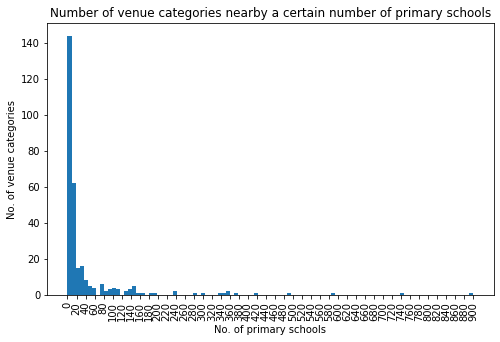

In [30]:
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(figsize = (8,5))
n, bins, patches = ax.hist(h['School'],bins = 100,range=(0,900))
ax.set_xticks(np.linspace(0,900,46))
ax.set_xticklabels(np.linspace(0,900,46),rotation = 90)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_title('Number of venue categories nearby a certain number of primary schools')
ax.set_xlabel('No. of primary schools')
ax.set_ylabel('No. of venue categories')
plt.savefig('histogram_venue_schools.png')

### Cluster primary schools by nearby venues
#### Get dummy variables for each venue category.

In [35]:
# one hot encoding
hk_onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
hk_onehot['School'] = venues['School'] 

# move neighborhood column to the first column
fixed_columns = [hk_onehot.columns[-1]] + list(hk_onehot.columns[:-1])
hk_onehot = hk_onehot[fixed_columns]

#### Group rows by school and by taking the mean of the frequency of occurrence of each category

In [50]:
hk_grouped = hk_onehot.groupby('School').mean().reset_index()
hk_grouped = hk_grouped[~hk_grouped['School'].isin(school_rep)]
hk_grouped

,School,Zoo,Accessories Store,American Restaurant,Amphitheater,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Water Park,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Xinjiang Restaurant,Yoga Studio,Yunnan Restaurant,Zhejiang Restaurant
0,ABERDEEN ST PETER'S CATHOLIC PRIMARY SCHOOL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ALDRICH BAY GOVERNMENT PRIMARY SCHOOL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ALLIANCE PRIMARY SCHOOL KOWLOON TONG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"ALLIANCE PRIMARY SCHOOL, SHEUNG SHUI",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"ALLIANCE PRIMARY SCHOOL, TAI HANG TUNG",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,YUEN LONG PO KOK PRIMARY SCHOOL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
555,YUEN LONG PUBLIC MIDDLE SCHOOL ALUMNI ASSOCIAT...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
556,YUEN LONG PUBLIC MIDDLE SCHOOL ALUMNI ASSOCIAT...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
557,YUK YIN SCHOOL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Write and use a function to create a dataframe with top frequent venues for each school

In [38]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


In [39]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['School']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
school_venues_sorted = pd.DataFrame(columns=columns)
school_venues_sorted['School'] = hk_grouped['School']

for ind in np.arange(hk_grouped.shape[0]):
    school_venues_sorted.iloc[ind, 1:] = return_most_common_venues(hk_grouped.iloc[ind, :], num_top_venues)

school_venues_sorted.head()

,School,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ABERDEEN ST PETER'S CATHOLIC PRIMARY SCHOOL,Shopping Mall,Sushi Restaurant,Thai Restaurant,Cha Chaan Teng,Athletics & Sports,Chinese Restaurant,Coffee Shop,Park,Taiwanese Restaurant,Noodle House
1,ALDRICH BAY GOVERNMENT PRIMARY SCHOOL,Noodle House,Dessert Shop,Park,Chinese Restaurant,Sushi Restaurant,BBQ Joint,Thai Restaurant,Betting Shop,Japanese Restaurant,Snack Place
2,ALLIANCE PRIMARY SCHOOL KOWLOON TONG,Chinese Restaurant,Asian Restaurant,Playground,Basketball Court,Restaurant,Gay Bar,French Restaurant,Flea Market,Flower Shop,Food & Drink Shop
3,"ALLIANCE PRIMARY SCHOOL, SHEUNG SHUI",Chinese Restaurant,Farmers Market,Bus Station,Shopping Mall,Burger Joint,Cha Chaan Teng,Fast Food Restaurant,Noodle House,Dim Sum Restaurant,Ramen Restaurant
4,"ALLIANCE PRIMARY SCHOOL, TAI HANG TUNG",Chinese Restaurant,Fast Food Restaurant,Noodle House,Café,Gas Station,Bar,Hong Kong Restaurant,Park,Dim Sum Restaurant,Restaurant


In [40]:
school_venues_sorted.shape

(559, 11)

#### The original dataframe of school contains more items than the dataframe with venue information, indicating that a few schools don't have nearby venue information. These were excluded in the later analyses.

In [51]:
school = school[school['School'].isin(school_venues_sorted.School)]

In [74]:
len(school['School'].unique())

559

#### Use Kmeans clustering to cluster the schools into 7 clusters

In [52]:
# set number of clusters
kclusters = 7

hk_grouped_clustering = hk_grouped.drop('School', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(hk_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([6, 6, 1, 1, 1, 6, 1, 1, 4, 1, 5, 6, 1, 1, 6, 6, 1, 1, 4, 1, 6, 5,
       6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 2, 6, 6, 6, 6,
       4, 1, 6, 6, 6, 1, 6, 6, 3, 6, 6, 4, 6, 6, 4, 4, 1, 1, 1, 1, 2, 0,
       6, 4, 5, 6, 1, 1, 1, 6, 6, 2, 5, 4, 6, 1, 6, 6, 6, 6, 6, 1, 6, 6,
       6, 1, 1, 6, 6, 1, 6, 6, 1, 5, 1, 5, 6, 4, 4, 1, 0, 1, 1, 5, 6, 6,
       4, 1, 3, 1, 5, 6, 4, 1, 6, 6, 6, 0, 5, 6, 6, 1, 1, 2, 1, 1, 6, 1,
       4, 1, 1, 1, 5, 2, 6, 4, 6, 6, 6, 6, 1, 6, 5, 6, 0, 1, 5, 6, 1, 5,
       5, 6, 4, 2, 5, 6, 4, 1, 1, 1, 1, 6, 1, 5, 6, 1, 4, 6, 6, 6, 6, 5,
       6, 6, 4, 1, 6, 6, 6, 1, 6, 6, 1, 6, 1, 6, 1, 1, 2, 2, 6, 6, 2, 1,
       5, 6, 6, 6, 6, 1, 5, 6, 6, 5, 1, 3, 5, 1, 1, 6, 6, 6, 1, 6, 4, 4,
       4, 1, 4, 5, 5, 4, 4, 5, 4, 5, 1, 1, 6, 6, 0, 1, 6, 6, 6, 0, 6, 6,
       6, 3, 6, 1, 1, 1, 6, 4, 6, 6, 6, 6, 1, 1, 6, 5, 1, 6, 1, 1, 2, 6,
       6, 1, 1, 1, 0, 1, 1, 4, 6, 6, 1, 5, 4, 4, 4, 1, 6, 6, 6, 4, 1, 4,
       6, 6, 6, 6, 1, 6, 6, 1, 2, 0, 6, 5, 5, 1, 6,

In [139]:
# add clustering labels
if school_venues_sorted.columns[0] == 'Cluster Labels':
    school_venues_sorted[['Cluster Labels']] = kmeans.labels_
else:
    school_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

hk_merged = school

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
hk_merged = hk_merged.join(school_venues_sorted.set_index('School'), on='School')

hk_merged.head() # check the last columns!

,SCHOOL NO.,School,Latitude,Longitude,Address,Dataset,Students Gender,Session,District,Religion,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,571180000123,NORTH POINT GOVERNMENT PRIMARY SCHOOL (CLOUD V...,22.28429,114.19478,22 CLOUD VIEW ROAD,Government Primary Schools,CO-ED,WHOLE DAY,WAN CHAI,NaN,...,Noodle House,Coffee Shop,Hotel,Dessert Shop,Japanese Restaurant,Sushi Restaurant,Vietnamese Restaurant,Bar,Cantonese Restaurant,Bakery
1,601667000123,HENNESSY ROAD GOVERNMENT PRIMARY SCHOOL (CAUSE...,22.27802,114.18877,3 EASTERN HOSPITAL ROAD CAUSEWAY BAY,Government Primary Schools,CO-ED,WHOLE DAY,WAN CHAI,NaN,...,Chinese Restaurant,Japanese Restaurant,Café,Cha Chaan Teng,Vietnamese Restaurant,Coffee Shop,Ice Cream Shop,Pizza Place,Ramen Restaurant,BBQ Joint
2,510084000123,HENNESSY ROAD GOVERNMENT PRIMARY SCH,22.27740,114.17556,169 THOMSON ROAD WANCHAI HONG KONG,Government Primary Schools,CO-ED,WHOLE DAY,WAN CHAI,NaN,...,Coffee Shop,Cantonese Restaurant,Hotel,Chinese Restaurant,Thai Restaurant,Lounge,Snack Place,Hong Kong Restaurant,Café,Italian Restaurant
3,534196000123,ALDRICH BAY GOVERNMENT PRIMARY SCHOOL,22.28238,114.22856,"1 OI LAI STREET, SHAU KEI WAN, HK",Government Primary Schools,CO-ED,WHOLE DAY,EASTERN,NaN,...,Noodle House,Dessert Shop,Park,Chinese Restaurant,Sushi Restaurant,BBQ Joint,Thai Restaurant,Betting Shop,Japanese Restaurant,Snack Place
4,510513000123,HOI PA STREET GOVERNMENT PRIMARY SCH,22.37204,114.11508,1 KAI CHI CLOSE TSUEN WAN NEW TERRITORIES,Government Primary Schools,CO-ED,WHOLE DAY,TSUEN WAN,NaN,...,Fast Food Restaurant,Chinese Restaurant,Noodle House,Shopping Mall,Cha Chaan Teng,Dessert Shop,Coffee Shop,Japanese Restaurant,Department Store,Market


In [55]:
hk_merged['Cluster Labels'].unique()

array([6, 5, 1, 4, 2, 0, 3], dtype=int64)

In [62]:
l = ['2nd Most Common Venue','3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue']

cluster_venues_list= []
for i in range(7):
    cluster_venues = hk_merged[hk_merged['Cluster Labels']==i+1]['1st Most Common Venue']
    for j in l:
        cluster_venues= pd.concat([cluster_venues,hk_merged[hk_merged['Cluster Labels']==i][j]])
    cluster_venues_list.append(cluster_venues.value_counts().sort_values(ascending = False)[:10].index.to_list())
df_cluster_venues = pd.DataFrame(cluster_venues_list, columns=['1st Most Common Venue']+l)
df_cluster_venues.reset_index(inplace = True)
df_cluster_venues.columns = ['Cluster Labels', '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue']
df_cluster_venues

,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Chinese Restaurant,Fast Food Restaurant,Hong Kong Restaurant,Shopping Mall,Asian Restaurant,Food Court,French Restaurant,Food Truck,Fried Chicken Joint,Food & Drink Shop
1,1,Fast Food Restaurant,Chinese Restaurant,Shopping Mall,Hong Kong Restaurant,Park,Cha Chaan Teng,Bus Station,Asian Restaurant,Convenience Store,Food Court
2,2,Food Court,Food & Drink Shop,Park,Food Truck,Flower Shop,French Restaurant,Chinese Restaurant,Fried Chicken Joint,Fujian Restaurant,Garden
3,3,Shopping Mall,Light Rail Station,Fast Food Restaurant,Fried Chicken Joint,Food Court,Flower Shop,Food Truck,Food & Drink Shop,Cha Chaan Teng,Flea Market
4,4,Fast Food Restaurant,Shopping Mall,Hong Kong Restaurant,Cha Chaan Teng,Bus Station,Light Rail Station,Chinese Restaurant,Market,Park,Food Court
5,5,Coffee Shop,Chinese Restaurant,Café,Food & Drink Shop,Japanese Restaurant,Food Court,Fast Food Restaurant,Food Truck,Flower Shop,Shopping Mall
6,6,Chinese Restaurant,Coffee Shop,Café,Fast Food Restaurant,Dessert Shop,Cantonese Restaurant,Noodle House,Shopping Mall,Japanese Restaurant,Cha Chaan Teng


In [636]:
df_cluster_venues.to_csv('df_cluster_venues.csv',index=None)

In [635]:

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(hk_merged['Latitude'], hk_merged['Longitude'], hk_merged['School'], hk_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [663]:
hk_merged['Cluster Labels'].value_counts()

6    242
1    149
4     67
5     56
2     28
0     12
3      5
Name: Cluster Labels, dtype: int64

In [665]:
hk_merged['Dataset'].value_counts()

Aided Primary Schools                    411
Private Primary Schools                   64
Government Primary Schools                33
International Schools (Primary)           24
Direct Subsidy Scheme Primary Schools     19
English Schools Foundation (Primary)       8
Name: Dataset, dtype: int64

#### Visualize locations of schools classified by other features

In [140]:
hk_merged['Religion']=hk_merged['Religion'].fillna('Nonreligious')

In [141]:
collist = ['Dataset','Students Gender', 'Session', 'District', 'Religion']
for col in collist:
    hk_merged[col] = pd.Categorical(hk_merged[col])
    hk_merged[col+'_code'] = hk_merged[col].cat.codes
 

In [661]:

# create map
map_clusters3 = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(hk_merged['Religion_code'].max()+1)
ys = [i + x + (i*x)**2 for i in range(hk_merged['Religion_code'].max()+1)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,cluster_name in zip(hk_merged['Latitude'], hk_merged['Longitude'], hk_merged['School'], hk_merged['Religion_code'],hk_merged['Religion'] ):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster_name), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters3)
       
map_clusters3

In [644]:
hk_merged.columns

Index(['SCHOOL NO.', 'School', 'Latitude', 'Longitude', 'Address', 'Dataset',
       'Students Gender', 'Session', 'District', 'Religion', 'Cluster Labels',
       '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue'],
      dtype='object')

In [80]:
hk_merged.Religion.value_counts()

Nonreligious                      238
PROTESTANTISM / CHRISTIANITY      183
CATHOLICISM                       107
BUDDHISM                           15
TAOISM                              8
CONFUCIANISM,BUDDHISM & TAOISM      4
ISLAM                               2
OTHERS                              1
CONFUCIANISM                        1
Name: Religion, dtype: int64

In [666]:
# create map
map_clusters4 = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(hk_merged['Dataset_code'].max()+1)
ys = [i + x + (i*x)**2 for i in range(hk_merged['Dataset_code'].max()+1)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,cluster_name in zip(hk_merged[~hk_merged['Dataset'].isin(['Aided Primary Schools'])]['Latitude'], 
                                               hk_merged[~hk_merged['Dataset'].isin(['Aided Primary Schools'])]['Longitude'], 
                                               hk_merged[~hk_merged['Dataset'].isin(['Aided Primary Schools'])]['School'], 
                                               hk_merged[~hk_merged['Dataset'].isin(['Aided Primary Schools'])]['Dataset_code'],
                                               hk_merged[~hk_merged['Dataset'].isin(['Aided Primary Schools'])]['Dataset'] ):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster_name), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters4)
       
map_clusters4

In [670]:
hk_merged['Students Gender'].value_counts()

CO-ED    531
GIRLS     18
BOYS      10
Name: Students Gender, dtype: int64

In [671]:
# create map
map_clusters5 = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(hk_merged['Students Gender_code'].max()+1)
ys = [i + x + (i*x)**2 for i in range(hk_merged['Students Gender_code'].max()+1)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,cluster_name in zip(hk_merged[~hk_merged['Students Gender'].isin(['CO-ED'])]['Latitude'], 
                                               hk_merged[~hk_merged['Students Gender'].isin(['CO-ED'])]['Longitude'], 
                                               hk_merged[~hk_merged['Students Gender'].isin(['CO-ED'])]['School'], 
                                               hk_merged[~hk_merged['Students Gender'].isin(['CO-ED'])]['Students Gender_code'],
                                               hk_merged[~hk_merged['Students Gender'].isin(['CO-ED'])]['Students Gender'] ):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster_name), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters5)
       
map_clusters5

### Explore the correlation between features of primary schools
#### Import packages

In [64]:
pip install dython

Note: you may need to restart the kernel to use updated packages.


In [65]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

from dython.model_utils import roc_graph
from dython.nominal import associations

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Process data for tuition and scores and merge with previous dataframe

In [134]:
tuition = pd.read_csv('tuition.csv')
ranking = pd.read_csv('ranking.csv')

In [510]:
hk_merged.columns

Index(['SCHOOL NO.', 'School', 'Latitude', 'Longitude', 'Address', 'Dataset',
       'Students Gender', 'Session', 'District', 'Religion', 'Cluster Labels',
       '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue', 'Dataset_code',
       'Students Gender_code', 'Session_code', 'District_code',
       'Religion_code', 'Tuition', 'Rank', 'Academic', 'PE', 'Music',
       'Teacher', 'Housing', 'Score_this_year', 'Score_overall'],
      dtype='object')

In [136]:
columns = ['Academic', 'PE', 'Music', 'Teacher', 'Housing',
       'Score_this_year']
for i in columns:
    ranking[i]=ranking[i].str.replace('?','').astype(float)
ranking['Rank']=ranking['Rank'].str.replace('?','').astype(int)
ranking['Score_overall']=ranking['Score_overall'].astype(int)

ranking

,Rank,School,Academic,PE,Music,Teacher,Housing,Score_this_year,Score_overall
0,1,DIOCESAN GIRLS' JUNIOR SCHOOL,10.0,10.0,10.0,8.0,9.0,9.57,9
1,10,YING WA PRIMARY SCHOOL,8.0,10.0,10.0,6.5,9.0,8.50,8
2,100,TAI PO OLD MARKET PUBLIC SCHOOL (PLOVER COVE),7.0,9.0,5.3,8.0,7.0,7.19,6
3,11,YAUMATI CATHOLIC PRIMARY SCHOOL (HOI WANG ROAD),9.0,8.0,7.5,7.0,8.0,8.21,8
4,12,ALLIANCE PRIMARY SCHOOL KOWLOON TONG,9.0,10.0,9.0,7.0,7.0,8.57,8
...,...,...,...,...,...,...,...,...,...
91,94,ST. ANTHONY'S SCHOOL,7.0,5.0,7.5,9.0,5.0,6.79,6
92,95,SHUN TAK FRATERNAL ASSOCIATION HO YAT TUNG PRI...,7.0,8.0,8.0,5.0,6.0,6.86,6
93,96,DIOCESAN PREPARATORY SCHOOL,7.0,7.0,4.5,7.0,7.5,6.71,6
94,98,ST. FRANCIS' CANOSSIAN SCHOOL,7.0,8.0,7.8,7.0,5.0,6.97,6


In [137]:
tuition.Tuition = tuition.Tuition.astype(float)

In [142]:
hk_merged = pd.merge(hk_merged,tuition,how='left',on='School')
hk_merged = pd.merge(hk_merged,ranking,how='left',on='School')
hk_merged

,SCHOOL NO.,School,Latitude,Longitude,Address,Dataset,Students Gender,Session,District,Religion,...,Religion_code,Tuition,Rank,Academic,PE,Music,Teacher,Housing,Score_this_year,Score_overall
0,571180000123,NORTH POINT GOVERNMENT PRIMARY SCHOOL (CLOUD V...,22.28429,114.19478,22 CLOUD VIEW ROAD,Government Primary Schools,CO-ED,WHOLE DAY,WAN CHAI,Nonreligious,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,601667000123,HENNESSY ROAD GOVERNMENT PRIMARY SCHOOL (CAUSE...,22.27802,114.18877,3 EASTERN HOSPITAL ROAD CAUSEWAY BAY,Government Primary Schools,CO-ED,WHOLE DAY,WAN CHAI,Nonreligious,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,510084000123,HENNESSY ROAD GOVERNMENT PRIMARY SCH,22.27740,114.17556,169 THOMSON ROAD WANCHAI HONG KONG,Government Primary Schools,CO-ED,WHOLE DAY,WAN CHAI,Nonreligious,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,534196000123,ALDRICH BAY GOVERNMENT PRIMARY SCHOOL,22.28238,114.22856,"1 OI LAI STREET, SHAU KEI WAN, HK",Government Primary Schools,CO-ED,WHOLE DAY,EASTERN,Nonreligious,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,510513000123,HOI PA STREET GOVERNMENT PRIMARY SCH,22.37204,114.11508,1 KAI CHI CLOSE TSUEN WAN NEW TERRITORIES,Government Primary Schools,CO-ED,WHOLE DAY,TSUEN WAN,Nonreligious,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,569909000123,DELIA (MAN KIU) ENGLISH PRIMARY SCHOOL,22.36061,114.10568,ESTATE PRIMARY SCHOOL NO 2 CHEUNG ON ESTATE PH...,Direct Subsidy Scheme Primary Schools,CO-ED,WHOLE DAY,KWAI TSING,Nonreligious,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
555,560553000123,PUI KIU COLLEGE,22.37441,114.17334,"1 TAI WAI NEW VILLAGE ROAD, TAI WAI, SHATIN, N...",Direct Subsidy Scheme Primary Schools,CO-ED,WHOLE DAY,SHA TIN,Nonreligious,...,5,25300.0,73.0,5.0,8.0,9.5,8.0,10.0,7.21,7.0
556,170070000323,ST. PAUL'S COLLEGE PRIMARY SCHOOL,22.25399,114.13829,777 VICTORIA ROAD HONG KONG,Direct Subsidy Scheme Primary Schools,BOYS,WHOLE DAY,SOUTHERN,PROTESTANTISM / CHRISTIANITY,...,7,30000.0,70.0,5.0,9.0,9.0,10.0,6.0,7.00,7.0
557,542105000323,ST. MARGARET'S CO-EDUCATIONAL ENGLISH SECONDAR...,22.33076,114.15177,"33 SHAM MONG ROAD, SHAMSHUIPO, KOWLOON",Direct Subsidy Scheme Primary Schools,CO-ED,WHOLE DAY,SHAM SHUI PO,CATHOLICISM,...,1,53000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
(hk_merged['Tuition']*hk_merged['Score_overall']).count()

15

In [157]:
hk_merged.Session.value_counts()

WHOLE DAY    558
A.M.           1
Name: Session, dtype: int64

In [147]:
tuition

,School,Tuition
0,ANFIELD SCHOOL,123500.0
1,DIOCESAN GIRLS' JUNIOR SCHOOL,70000.0
2,PO LEUNG KUK CHOI KAI YAU SCHOOL,82500.0
3,PO LEUNG KUK CAMOES TAN SIU LIN PRIMARY SCHOOL,19800.0
4,HKCA PO LEUNG KUK SCHOOL,96900.0
5,PO LEUNG KUK LAM MAN CHAN ENGLISH PRIMARY SCHOOL,13550.0
6,PO LEUNG KUK LUK HING TOO PRIMARY SCHOOL,13000.0
7,EVANGEL COLLEGE,21300.0
8,TSUNG TSIN PRIMARY SCHOOL AND KINDERGARTEN,56560.0
9,ST. HILARY'S PRIMARY SCHOOL,80520.0


#### Explore correlation between differnt ratings for primary schools

C:\Users\fruol\Anaconda3\lib\site-packages\dython\nominal.py:221: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.dropna(axis=0, inplace=True)


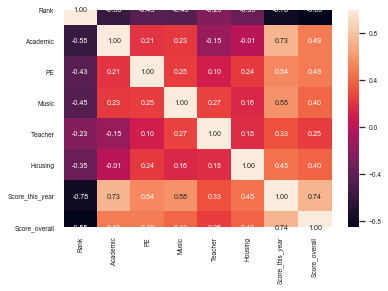

In [143]:
school_association1 = associations(hk_merged[['Rank', 'Academic', 'PE', 'Music','Teacher', 'Housing', 'Score_this_year', 'Score_overall']], nominal_columns=None, nan_strategy = 'drop_samples',theil_u=True, plot=True, return_results=True)

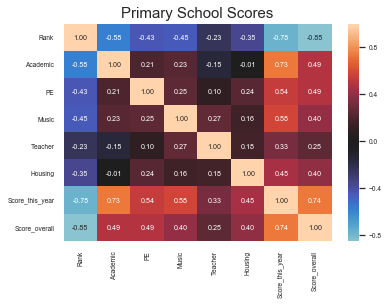

In [145]:
sns.set(font_scale = 0.6)
sns.heatmap(school_association1,annot = True,fmt = '.2f',center = 0)

b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title('Primary School Scores',fontsize = 15)
plt.savefig('heatmap_grade.png',bbox_inches = 'tight')
plt.show()

In [513]:
hk_merged['Rank_reverse']=100-hk_merged['Rank']

#### Explore different features of primary schools including the overall rating

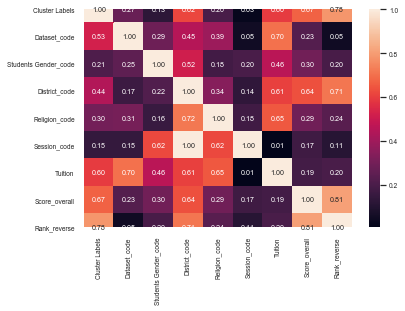

In [514]:
school_association2 = associations(hk_merged[['Cluster Labels','Dataset_code',
       'Students Gender_code', 'District_code',
       'Religion_code','Session_code', 'Tuition','Score_overall','Rank_reverse']]
                                   , nominal_columns=['Cluster Labels','Dataset_code',
       'Students Gender_code','Session_code','District_code','Religion_code']
                                   , nan_strategy = 'drop_samples'
                                   ,theil_u=True, plot=True, return_results=True)

In [238]:
school_association2

,Cluster Labels,Dataset_code,Students Gender_code,District_code,Religion_code,Tuition,Score_overall
Cluster Labels,1.000000,0.273791,0.125741,0.616910,0.199816,0.596239,0.673812
Dataset_code,0.527759,1.000000,0.285768,0.450710,0.394895,0.702482,0.227429
Students Gender_code,0.213302,0.251486,1.000000,0.516605,0.180174,0.462738,0.298245
District_code,0.443018,0.167911,0.218696,1.000000,0.342360,0.605722,0.638222
Religion_code,0.301121,0.308728,0.160061,0.718447,1.000000,0.653560,0.293610
Tuition,0.596239,0.702482,0.462738,0.605722,0.653560,1.000000,0.185925
Score_overall,0.673812,0.227429,0.298245,0.638222,0.293610,0.185925,1.000000


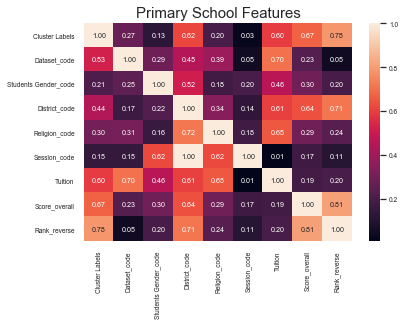

In [515]:
sns.set(font_scale = 0.6)
sns.heatmap(school_association2,annot = True,fmt = '.2f')

b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title('Primary School Features',fontsize = 15)
#plt.savefig('heatmap_school.png',bbox_inches = 'tight')
plt.show()

#### Explore the relationship between the tuition, overall overall score of the primary schools with other features
#### A function is written to draw scattered bar plots with different categories

In [490]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [243]:
def drawplot(df,col1,col2,width,height,rot=0,ha = 'center',save=None,ticklabel=None):

        sns.set(font_scale=1)
        fig,ax = plt.subplots(figsize = (width,height))
        
        y=[]
        ticklabel1=[]
        for i in df[col1].unique():
            if (df[df[col1] == i][col2].isna().sum() != len(df[df[col1] == i][col2])):
                y.append(hk_merged[hk_merged[col1] == i][col2])
                ticklabel1.append(i)
                

        w = 0.6*10/len(y)
        #colors = [(0, 0, 1, 1), (1, 0, 0, 1),(0,1,0,1)]
        x = [l*(10/len(y)) for l in list(range(len(y)))]

        
        ax.bar(x,
               height=[np.mean(yi) for yi in y],
               yerr=[np.std(yi) for yi in y],    # error bars
               capsize=3*w, # error bar cap width in points
               width=w,    # bar width
               color=(0,0,0,0),  # face color transparent
               edgecolor='Black',
               linewidth = 1
               #ecolor=colors,    # error bar colors; setting this raises an error for whatever reason.
               )
        ax.set_title(col2+'_'+col1, fontsize=12)
        ax.set_xticks(x)
        if ticklabel != None:
            ax.set_xticklabels(ticklabel,rotation = rot, ha=ha,va='top', multialignment = 'right')

        else:
            ax.set_xticklabels(ticklabel1,rotation = rot, ha=ha,va='top')
        
        
        ax.grid(None)
        #ax.set_facecolor('white')

        for i in range(len(x)):
            # distribute scatter randomly across whole width of bar
            ax.scatter(x[i] + np.random.random(y[i].size) * w - w / 2, y[i],s=3
                       #, color=colors[i]#
                      )
        
        if save == None:
            plt.show()
        else:
            fig.savefig(save,bbox_inches = 'tight')

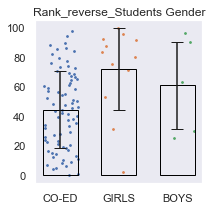

In [516]:
df=hk_merged
col2= 'Rank_reverse'
drawplot(df,'Students Gender',col2,3,3,0
         ,save="rank_rv_students_gender.png"
        )

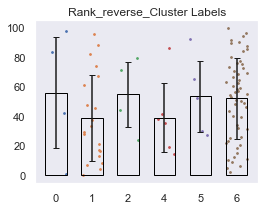

In [517]:
drawplot(hk_merged,'Cluster Labels',col2,4,3,0
         ,save = "rank_rv_cluster_labels.png"
        )

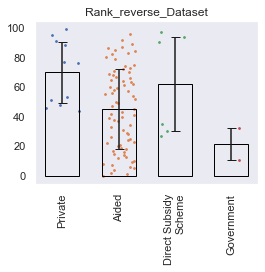

In [522]:
ticklabel = ['Private', 'Aided','Direct Subsidy\nScheme','Government']
drawplot(df,'Dataset',col2,4,3,90
        ,ticklabel= ticklabel
         ,save="rank_rv_dataset.png"
        )

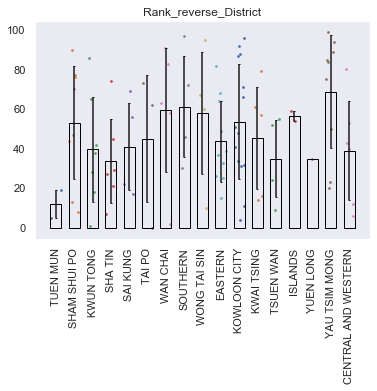

In [519]:
drawplot(df,'District',col2,6,4,90
         ,save="rank_rv_district.png"
        )

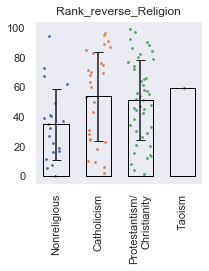

In [521]:
drawplot(df,'Religion',col2,3,3,rot=90
         ,ticklabel = ['Nonreligious','Catholicism','Protestantism/\nChristianity','Taoism']
        ,save="rank_rv_religion.png"
        )

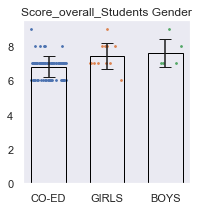

In [295]:
df=hk_merged
col2= 'Score_overall'
drawplot(df,'Students Gender',col2,3,3,0
         ,save="Score_students_gender.png"
        )

In [296]:
hk_merged = hk_merged.sort_values('Cluster Labels')

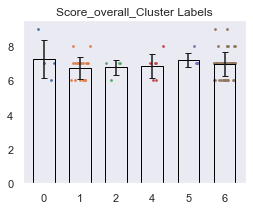

In [297]:
drawplot(hk_merged,'Cluster Labels',col2,4,3,0
         ,save = "Score_cluster_labels.png"
        )

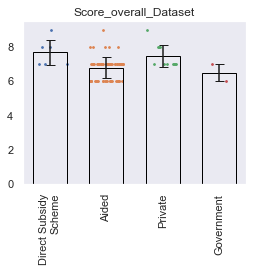

In [248]:
ticklabel = ['Direct Subsidy\nScheme',
                                'Aided','Private','Government']
drawplot(df,'Dataset',col2,4,3,90
         ,ticklabel= ticklabel
         ,save="Score_dataset.png"
        )

In [298]:
sorter = hk_merged.groupby('District').mean()[['Score_overall']].sort_values('Score_overall').reset_index()['District'].to_list()
df.District = df.District.astype("category")
df.District.cat.set_categories(sorter, inplace=True)
df = df.sort_values(["District"])

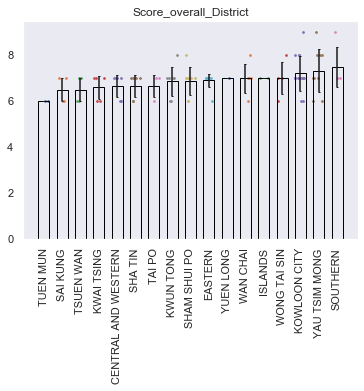

In [299]:
drawplot(df,'District',col2,6,4,90
         ,save="Score_district.png"
        )

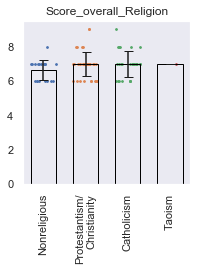

In [252]:
drawplot(df,'Religion',col2,3,3,rot=90
         ,ticklabel = ['Nonreligious','Protestantism/\nChristianity','Catholicism','Taoism']
        ,save="Score_religion.png"
        )

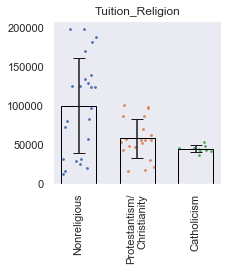

In [260]:
col2 = 'Tuition'
drawplot(df,'Religion',col2,3,3,rot=90
         ,ticklabel = ['Nonreligious','Protestantism/\nChristianity','Catholicism']
        ,save="tuition_religion.png"
        )

In [265]:
hk_merged.groupby('District').count()

,SCHOOL NO.,School,Latitude,Longitude,Address,Dataset,Students Gender,Session,Religion,Cluster Labels,...,Religion_code,Tuition,Rank,Academic,PE,Music,Teacher,Housing,Score_this_year,Score_overall
District,,,,,,,,,,,,,,,,,,,,,
CENTRAL AND WESTERN,24,24,24,24,24,24,24,24,24,24,...,24,5,6,6,6,6,6,6,6,6
EASTERN,34,34,34,34,34,34,34,34,34,34,...,34,1,10,10,10,10,10,10,10,10
ISLANDS,20,20,20,20,20,20,20,20,20,20,...,20,1,2,2,2,2,2,2,2,2
KOWLOON CITY,54,54,54,54,54,54,54,54,54,54,...,54,6,14,14,14,14,14,14,14,14
KWAI TSING,31,31,31,31,31,31,31,31,31,31,...,31,0,5,5,5,5,5,5,5,5
KWUN TONG,38,38,38,38,38,38,38,38,38,38,...,38,2,7,7,7,7,7,7,7,7
NORTH,24,24,24,24,24,24,24,24,24,24,...,24,0,0,0,0,0,0,0,0,0
SAI KUNG,29,29,29,29,29,29,29,29,29,29,...,29,4,4,4,4,4,4,4,4,4
SHA TIN,44,44,44,44,44,44,44,44,44,44,...,44,3,6,6,6,6,6,6,6,6


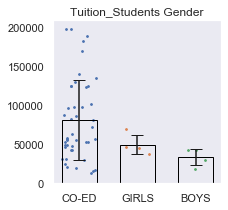

In [255]:
drawplot(df,'Students Gender',col2,3,3,0
         ,save="tuition_students_gender.png"
        )

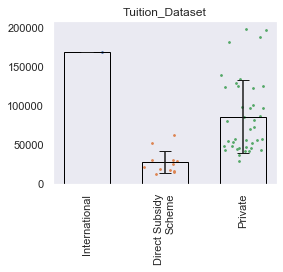

In [262]:
drawplot(df,'Dataset',col2,4,3,rot=90
         ,ticklabel= ["International", "Direct Subsidy\nScheme", "Private"]
         ,save="tuition_dataset.png"
        )

In [115]:
hk_merged['Dataset'].unique()

[International Schools (Primary), Aided Primary Schools, Private Primary Schools, Direct Subsidy Scheme Primary Schools, English Schools Foundation (Primary), Government Primary Schools]
Categories (6, object): [International Schools (Primary), Aided Primary Schools, Private Primary Schools, Direct Subsidy Scheme Primary Schools, English Schools Foundation (Primary), Government Primary Schools]

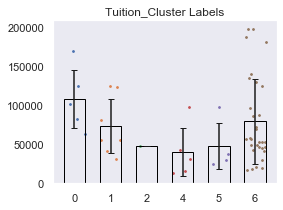

In [263]:
drawplot(df,'Cluster Labels',col2,4,3,0
         ,save = "tuition_cluster_labels.png"
        )

In [288]:
sorter = hk_merged.groupby('District').mean()[['Tuition']].sort_values('Tuition').reset_index()['District'].to_list()
sorter

['EASTERN',
 'KWUN TONG',
 'WONG TAI SIN',
 'SHAM SHUI PO',
 'KOWLOON CITY',
 'YUEN LONG',
 'TUEN MUN',
 'CENTRAL AND WESTERN',
 'SAI KUNG',
 'YAU TSIM MONG',
 'SHA TIN',
 'WAN CHAI',
 'TAI PO',
 'SOUTHERN',
 'ISLANDS',
 'KWAI TSING',
 'NORTH',
 'TSUEN WAN']

In [289]:
df.District = df.District.astype("category")
df.District.cat.set_categories(sorter, inplace=True)
df.District

119               TUEN MUN
550               SOUTHERN
158              KWUN TONG
436               WAN CHAI
75                SAI KUNG
              ...         
31                  TAI PO
491    CENTRAL AND WESTERN
493           WONG TAI SIN
22            SHAM SHUI PO
0                 WAN CHAI
Name: District, Length: 559, dtype: category
Categories (18, object): [EASTERN, KWUN TONG, WONG TAI SIN, SHAM SHUI PO, ..., ISLANDS, KWAI TSING, NORTH, TSUEN WAN]

In [292]:
df = df.sort_values(["District"])

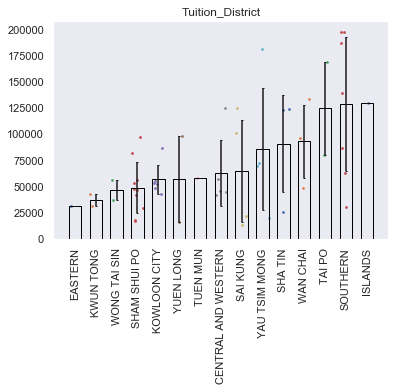

In [293]:
drawplot(df,'District',col2,6,4,90
         ,save="tuition_district.png"
        )

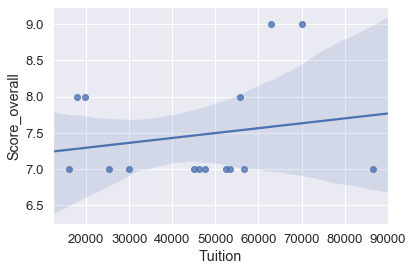

In [294]:
sns.set(font_scale = 1.2)
plot = sns.regplot('Tuition','Score_overall',hk_merged)

fig = plot.get_figure()
fig.savefig('tuition_rating.png')

In [119]:
hk_merged.columns = ['SCHOOL NO.', 'School', 'Latitude', 'Longitude', 'Address', 'Dataset',
       'Students Gender', 'Session', 'District', 'Religion', 'Cluster Labels',
       '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue', 'Dataset_code',
       'Students Gender_code', 'Session_code', 'District_code',
       'Religion_code', 'Tuition', 'Rank', 'Academic', 'PE', 'Music',
       'Teacher', 'Housing', 'Rating_this_year', 'Rating_overall']

### Explore the correlation between different statistics of the 18 districts including the density of primary schools and the most common cluster label

#### Generate list of common cluster labels for each district

In [122]:
cluster_label_district = hk_merged.groupby(['District'])[['Cluster Labels']].agg(lambda x:x.value_counts(ascending = False).index[0]).reset_index()
cluster_label_district

,District,Cluster Labels
0,CENTRAL AND WESTERN,6
1,EASTERN,6
2,ISLANDS,6
3,KOWLOON CITY,6
4,KWAI TSING,1
5,KWUN TONG,5
6,NORTH,1
7,SAI KUNG,6
8,SHA TIN,1
9,SHAM SHUI PO,6


#### Same analysis on "Dataset" gives same result for all districts. Therefore this variable is not used in future analysis.

In [300]:
dataset_district = hk_merged.groupby(['District'])[['Dataset']].agg(lambda x:x.value_counts(ascending = False).index[0]).reset_index()
dataset_district

,District,Dataset
0,EASTERN,Aided Primary Schools
1,KWUN TONG,Aided Primary Schools
2,WONG TAI SIN,Aided Primary Schools
3,SHAM SHUI PO,Aided Primary Schools
4,KOWLOON CITY,Aided Primary Schools
5,YUEN LONG,Aided Primary Schools
6,TUEN MUN,Aided Primary Schools
7,CENTRAL AND WESTERN,Aided Primary Schools
8,SAI KUNG,Aided Primary Schools
9,YAU TSIM MONG,Aided Primary Schools


#### Count the number of primary schools in each district

In [124]:
school_district = hk_merged.groupby(['District']).count()[['School']].reset_index()
school_district

,District,School
0,CENTRAL AND WESTERN,24
1,EASTERN,34
2,ISLANDS,20
3,KOWLOON CITY,54
4,KWAI TSING,31
5,KWUN TONG,38
6,NORTH,24
7,SAI KUNG,29
8,SHA TIN,44
9,SHAM SHUI PO,32


#### Import data for 18 districts containing household domestic rent and income statistics as well as area data. The density of schools is calculated based on the number and the area.

In [469]:
district_stat = pd.read_csv('HK_18districts_stat.csv')
district_stat['District']= district_stat['District'].str.upper()
district_stat = pd.merge(district_stat,school_district,on = 'District')
district_stat = pd.merge(district_stat,cluster_label_district,on = 'District')
district_stat['Shape__Area']=district_stat['Shape__Area']/1000000
district_stat['Density of Schools'] =district_stat['School']/district_stat['Shape__Area']
district_stat.drop(['Shape__Length'],axis = 1,inplace = True)
district_stat

,Region,District,Median Monthly Domestic Household Rent,Median Monthly Domestic Household Income,Median Rent to Income Ratio,Median Mortgage Payment and Loan Repayment to Income Ratio,Median Monthly Domestic Household Rent_Public rental housing units,Median Monthly Domestic Household Rent_Private residential flats,Median Monthly Domestic Household Rent_Other quarters in private permanent housing,Median Monthly Domestic Household Rent_Permanent quarters in other types of housing,Median Monthly Domestic Household Rent_Temporary quarters,Median Monthly Domestic Household Rent_Overall,Shape__Area,School,Cluster Labels,Density of Schools
0,Hong Kong Island,CENTRAL AND WESTERN,14000,36000,0.306,0.188,1750,15020,8800,4700.0,3700.0,14000,14.604741,24,6,1.643302
1,Hong Kong Island,EASTERN,3000,29830,0.185,0.190,1650,12000,2750,8000.0,NaN,3000,21.842113,34,6,1.556626
2,Hong Kong Island,SOUTHERN,2110,30000,0.119,0.176,1500,17000,7500,8000.0,3000.0,2110,46.449337,23,6,0.495163
3,Hong Kong Island,WAN CHAI,14000,37750,0.315,0.216,1750,15300,8900,4500.0,NaN,14000,11.614898,22,6,1.894119
4,Kowloon,KOWLOON CITY,2750,25550,0.185,0.199,1550,9000,5000,6000.0,3800.0,2750,11.842853,54,6,4.559712
5,Kowloon,KWUN TONG,1870,20160,0.114,0.176,1750,9000,2400,6500.0,5300.0,1870,13.221241,38,5,2.874163
6,Kowloon,SHAM SHUI PO,2500,20000,0.171,0.186,1600,5500,2700,1350.0,4500.0,2500,11.160981,32,6,2.867132
7,Kowloon,WONG TAI SIN,1750,22000,0.102,0.175,1700,8500,2500,4500.0,2250.0,1750,10.927837,29,6,2.653773
8,Kowloon,YAU TSIM MONG,6000,23500,0.306,0.212,2730,6230,2800,17000.0,3400.0,6000,8.135366,25,6,3.073003
9,New Territories,ISLANDS,2600,27700,0.138,0.203,1750,16000,6000,NaN,1500.0,2600,209.047253,20,6,0.095672


#### Correlation heatmap with the selected features.

In [470]:
dataset = hk_merged.groupby(['District','Dataset']).count()[['School']].reset_index()
dataset

,District,Dataset,School
0,EASTERN,Aided Primary Schools,24.0
1,EASTERN,Direct Subsidy Scheme Primary Schools,2.0
2,EASTERN,English Schools Foundation (Primary),1.0
3,EASTERN,Government Primary Schools,3.0
4,EASTERN,International Schools (Primary),3.0
...,...,...,...
103,TSUEN WAN,Direct Subsidy Scheme Primary Schools,NaN
104,TSUEN WAN,English Schools Foundation (Primary),NaN
105,TSUEN WAN,Government Primary Schools,2.0
106,TSUEN WAN,International Schools (Primary),NaN


In [471]:
cluster = hk_merged.groupby(['District','Cluster Labels']).count()[['School']].reset_index()
cluster

,District,Cluster Labels,School
0,EASTERN,0,NaN
1,EASTERN,1,9.0
2,EASTERN,2,NaN
3,EASTERN,3,2.0
4,EASTERN,4,NaN
...,...,...,...
121,TSUEN WAN,2,1.0
122,TSUEN WAN,3,NaN
123,TSUEN WAN,4,1.0
124,TSUEN WAN,5,7.0


In [472]:

list1 = []
district = cluster.District.unique()
for i in district :
    list1.append(cluster[cluster['District']==i]['School'].to_list())

df_cluster = pd.DataFrame(list1)
df_cluster = pd.concat([pd.DataFrame(district),df_cluster],ignore_index = True, axis = 1)
df_cluster.columns = ['District','Cluter 0', 'Cluter 1', 'Cluter 2','Cluter 3','Cluter 4','Cluter 5','Cluter 6']

df_cluster

,District,Cluter 0,Cluter 1,Cluter 2,Cluter 3,Cluter 4,Cluter 5,Cluter 6
0,EASTERN,NaN,9.0,NaN,2.0,NaN,2.0,21.0
1,KWUN TONG,3.0,5.0,3.0,NaN,7.0,11.0,9.0
2,WONG TAI SIN,1.0,11.0,1.0,NaN,1.0,2.0,13.0
3,SHAM SHUI PO,1.0,11.0,1.0,NaN,5.0,NaN,14.0
4,KOWLOON CITY,NaN,17.0,6.0,NaN,1.0,3.0,27.0
5,YUEN LONG,NaN,8.0,3.0,NaN,18.0,9.0,11.0
6,TUEN MUN,1.0,1.0,1.0,NaN,24.0,2.0,7.0
7,CENTRAL AND WESTERN,NaN,NaN,NaN,NaN,NaN,NaN,24.0
8,SAI KUNG,2.0,6.0,1.0,NaN,3.0,3.0,14.0
9,YAU TSIM MONG,NaN,NaN,NaN,NaN,NaN,1.0,24.0


In [366]:
dataset.Dataset.unique().astype(str)

array(['Aided Primary Schools', 'Direct Subsidy Scheme Primary Schools',
       'English Schools Foundation (Primary)',
       'Government Primary Schools', 'International Schools (Primary)',
       'Private Primary Schools'], dtype='<U37')

In [473]:
list2 = []
district = dataset.District.unique()
for i in district :
    list2.append(dataset[dataset['District']==i]['School'].to_list())

df_dataset = pd.DataFrame(list2)
df_dataset = pd.concat([pd.DataFrame(district),df_dataset],ignore_index = True, axis = 1)
df_dataset.columns = ['District','Aided Primary Schools', 'Direct Subsidy Scheme Primary Schools','English Schools Foundation (Primary)','Government Primary Schools', 'International Schools (Primary)','Private Primary Schools']

df_dataset

,District,Aided Primary Schools,Direct Subsidy Scheme Primary Schools,English Schools Foundation (Primary),Government Primary Schools,International Schools (Primary),Private Primary Schools
0,EASTERN,24.0,2.0,1.0,3.0,3.0,1.0
1,KWUN TONG,32.0,1.0,NaN,2.0,1.0,2.0
2,WONG TAI SIN,24.0,NaN,NaN,1.0,NaN,4.0
3,SHAM SHUI PO,17.0,3.0,NaN,3.0,1.0,8.0
4,KOWLOON CITY,27.0,1.0,3.0,4.0,5.0,14.0
5,YUEN LONG,42.0,2.0,NaN,2.0,NaN,3.0
6,TUEN MUN,32.0,1.0,NaN,1.0,1.0,1.0
7,CENTRAL AND WESTERN,13.0,NaN,2.0,2.0,1.0,6.0
8,SAI KUNG,21.0,3.0,NaN,1.0,2.0,2.0
9,YAU TSIM MONG,17.0,1.0,NaN,3.0,NaN,4.0


In [474]:
district_stat = pd.merge(district_stat, df_cluster,how = 'left', on = 'District')
district_stat = pd.merge(district_stat, df_dataset,how = 'left', on = 'District')

In [475]:
labels = ['Cluter 0', 'Cluter 1', 'Cluter 2','Cluter 3','Cluter 4','Cluter 5','Cluter 6','Aided Primary Schools', 'Direct Subsidy Scheme Primary Schools','English Schools Foundation (Primary)','Government Primary Schools', 'International Schools (Primary)','Private Primary Schools']
for i in labels:
    district_stat[i+'_frac']= district_stat[i]/district_stat['School']
district_stat

,Region,District,Median Monthly Domestic Household Rent,Median Monthly Domestic Household Income,Median Rent to Income Ratio,Median Mortgage Payment and Loan Repayment to Income Ratio,Median Monthly Domestic Household Rent_Public rental housing units,Median Monthly Domestic Household Rent_Private residential flats,Median Monthly Domestic Household Rent_Other quarters in private permanent housing,Median Monthly Domestic Household Rent_Permanent quarters in other types of housing,...,Cluter 3_frac,Cluter 4_frac,Cluter 5_frac,Cluter 6_frac,Aided Primary Schools_frac,Direct Subsidy Scheme Primary Schools_frac,English Schools Foundation (Primary)_frac,Government Primary Schools_frac,International Schools (Primary)_frac,Private Primary Schools_frac
0,Hong Kong Island,CENTRAL AND WESTERN,14000,36000,0.306,0.188,1750,15020,8800,4700.0,...,NaN,NaN,NaN,1.000000,0.541667,NaN,0.083333,0.083333,0.041667,0.250000
1,Hong Kong Island,EASTERN,3000,29830,0.185,0.190,1650,12000,2750,8000.0,...,0.058824,NaN,0.058824,0.617647,0.705882,0.058824,0.029412,0.088235,0.088235,0.029412
2,Hong Kong Island,SOUTHERN,2110,30000,0.119,0.176,1500,17000,7500,8000.0,...,NaN,NaN,0.130435,0.608696,0.391304,0.086957,0.043478,0.086957,0.173913,0.217391
3,Hong Kong Island,WAN CHAI,14000,37750,0.315,0.216,1750,15300,8900,4500.0,...,NaN,NaN,NaN,0.909091,0.454545,NaN,0.045455,0.181818,0.045455,0.272727
4,Kowloon,KOWLOON CITY,2750,25550,0.185,0.199,1550,9000,5000,6000.0,...,NaN,0.018519,0.055556,0.500000,0.500000,0.018519,0.055556,0.074074,0.092593,0.259259
5,Kowloon,KWUN TONG,1870,20160,0.114,0.176,1750,9000,2400,6500.0,...,NaN,0.184211,0.289474,0.236842,0.842105,0.026316,NaN,0.052632,0.026316,0.052632
6,Kowloon,SHAM SHUI PO,2500,20000,0.171,0.186,1600,5500,2700,1350.0,...,NaN,0.156250,NaN,0.437500,0.531250,0.093750,NaN,0.093750,0.031250,0.250000
7,Kowloon,WONG TAI SIN,1750,22000,0.102,0.175,1700,8500,2500,4500.0,...,NaN,0.034483,0.068966,0.448276,0.827586,NaN,NaN,0.034483,NaN,0.137931
8,Kowloon,YAU TSIM MONG,6000,23500,0.306,0.212,2730,6230,2800,17000.0,...,NaN,NaN,0.040000,0.960000,0.680000,0.040000,NaN,0.120000,NaN,0.160000
9,New Territories,ISLANDS,2600,27700,0.138,0.203,1750,16000,6000,NaN,...,0.050000,NaN,NaN,0.700000,0.800000,NaN,NaN,NaN,0.050000,0.150000


In [476]:
district_stat.fillna(0,inplace =True)

In [477]:
tuition_score = hk_merged.groupby('District').mean()[['Tuition','Score_overall']]
tuition_score.reset_index(inplace=True)

In [478]:
district_stat = pd.merge(district_stat, tuition_score,how = 'left', on = 'District')

In [479]:
district_stat['Density of Schools']

0     1.643302
1     1.556626
2     0.495163
3     1.894119
4     4.559712
5     2.874163
6     2.867132
7     2.653773
8     3.073003
9     0.095672
10    1.117152
11    0.148223
12    0.180917
13    0.541935
14    0.137629
15    0.286985
16    0.362863
17    0.297192
Name: Density of Schools, dtype: float64

In [481]:
district_stat.columns=['Region', 'District', 'Median Monthly Domestic Household Rent',
       'Median Monthly Domestic Household Income',
       'Median Rent to Income Ratio',
       'Median Mortgage Payment and Loan Repayment to Income Ratio',
       'Median Monthly Domestic Household Rent_Public rental housing units',
       'Median Monthly Domestic Household Rent_Private residential flats',
       'Median Monthly Domestic Household Rent_Other quarters in private permanent housing',
       'Median Monthly Domestic Household Rent_Permanent quarters in other types of housing',
       'Median Monthly Domestic Household Rent_Temporary quarters',
       'Median Monthly Domestic Household Rent_Overall', 'Shape__Area (square km)',
       'Number of Schools', 'Cluster Labels', 'Density of Schools (per square km)', 'Cluter 0',
       'Cluter 1', 'Cluter 2', 'Cluter 3', 'Cluter 4', 'Cluter 5', 'Cluter 6',
       'Aided Primary Schools', 'Direct Subsidy Scheme Primary Schools',
       'English Schools Foundation (Primary)', 'Government Primary Schools',
       'International Schools (Primary)', 'Private Primary Schools',
       'Cluter 0_frac', 'Cluter 1_frac', 'Cluter 2_frac', 'Cluter 3_frac',
       'Cluter 4_frac', 'Cluter 5_frac', 'Cluter 6_frac',
       'Aided Primary Schools_frac',
       'Direct Subsidy Scheme Primary Schools_frac',
       'English Schools Foundation (Primary)_frac',
       'Government Primary Schools_frac',
       'International Schools (Primary)_frac', 'Private Primary Schools_frac',
       'Tuition', 'Score_overall']

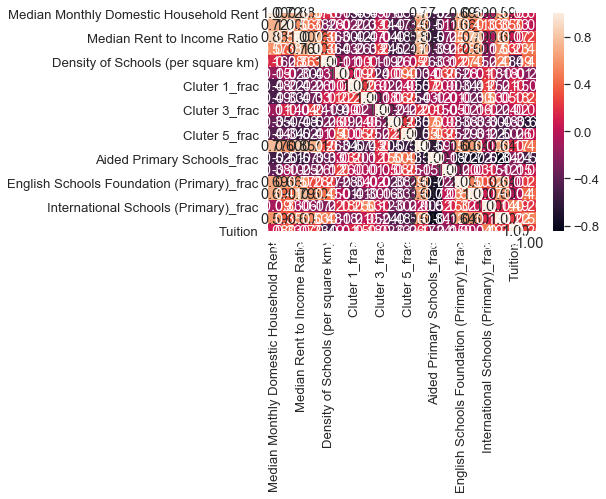

In [483]:
 district_stat2 = district_stat[['Median Monthly Domestic Household Rent',
       'Median Monthly Domestic Household Income',
       'Median Rent to Income Ratio',
       'Median Mortgage Payment and Loan Repayment to Income Ratio','Density of Schools (per square km)','Cluter 0_frac', 'Cluter 1_frac', 'Cluter 2_frac', 'Cluter 3_frac',
       'Cluter 4_frac', 'Cluter 5_frac', 'Cluter 6_frac',
       'Aided Primary Schools_frac',
       'Direct Subsidy Scheme Primary Schools_frac',
       'English Schools Foundation (Primary)_frac',
       'Government Primary Schools_frac',
       'International Schools (Primary)_frac', 'Private Primary Schools_frac',
       'Tuition', 'Score_overall']]
    
district_association = associations(district_stat2, nan_strategy = 'drop_samples', plot=True, return_results=True)


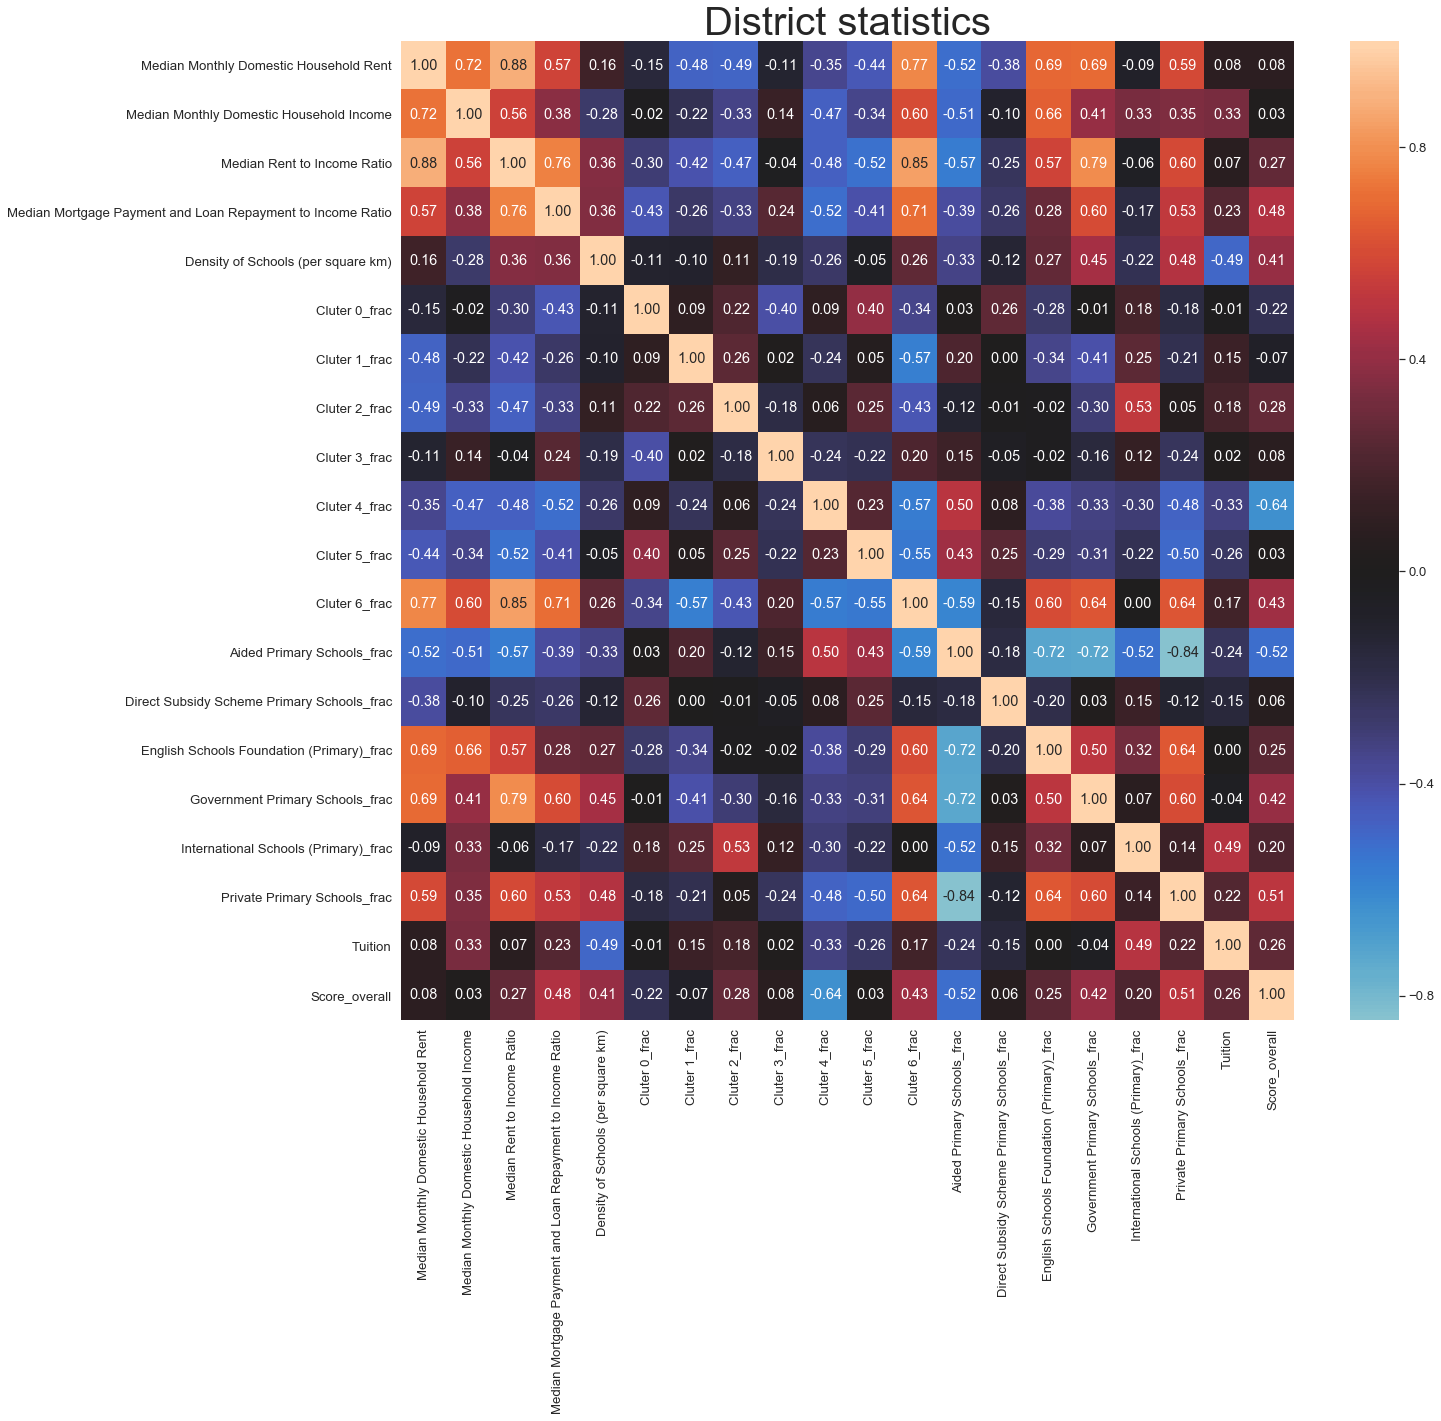

In [491]:
sns.set(font_scale = 1.2)
fig, ax = plt.subplots(figsize=(20,18))
sns.heatmap(district_association,annot = True,fmt = '.2f',center =0)

b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title('District statistics',fontsize = 40)
#plt.figure(figsize=(20,20),dpi=72)
plt.savefig('heatmap_district.png',dpi=72,bbox_inches = 'tight')
plt.show()

#### Use regression plot to explore correlation between specific variables

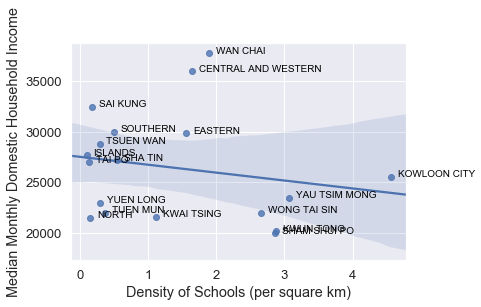

In [502]:

ax = sns.regplot('Density of Schools (per square km)','Median Monthly Domestic Household Income',data=district_stat)

for line in range(0,district_stat.shape[0]):
    ax.text(district_stat['Density of Schools (per square km)'][line]+0.1, district_stat['Median Monthly Domestic Household Income'][line], 
    district_stat.District[line], horizontalalignment='left', color='black',size='x-small')

plt.savefig('school_income.png',bbox_inches = 'tight')
plt.show()

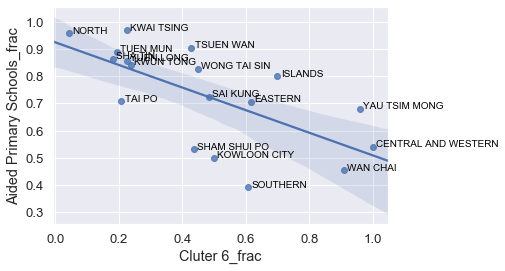

In [509]:

ax = sns.regplot('Cluter 6_frac',  'Aided Primary Schools_frac',data=district_stat)

for line in range(0,district_stat.shape[0]):
    ax.text(district_stat['Cluter 6_frac'][line]+0.01, district_stat[  'Aided Primary Schools_frac'][line], 
    district_stat.District[line], horizontalalignment='left', color='black',size='x-small')

plt.savefig('cluste6_aided.png',bbox_inches = 'tight')
plt.show()